<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_04_Pandas Pivot Tables.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## 🟩 Count Job Postings by Title and Country (2.4.1)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df.pivot_table(
    index='job_country',
    columns='job_title_short',
    aggfunc='size',
    #fill_value=0
)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,NaN,9.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,NaN,1.0,NaN,12.0
Angola,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


---

## 🟨 Salary Stats by Job Title (2.4.2)

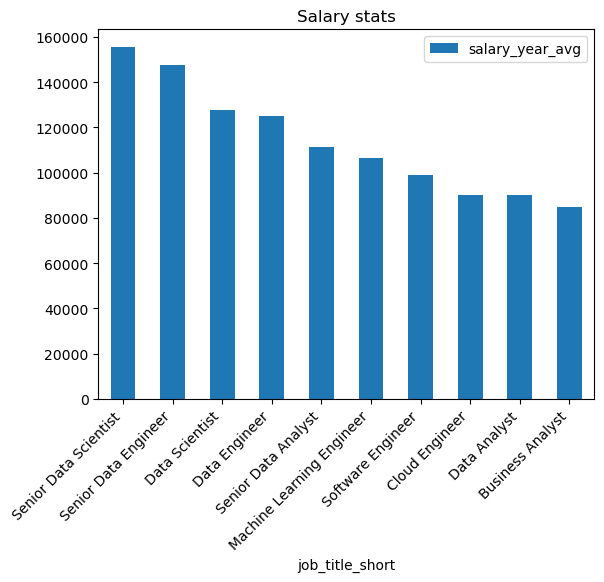

In [4]:
salary_job_title = df.pivot_table(
    aggfunc="median",
    index="job_title_short",
    sort=True,
    values="salary_year_avg"
).sort_values(by="salary_year_avg",ascending=False)
salary_job_title.plot(kind='bar')
plt.title('Salary stats')
plt.xticks(rotation = 45, ha='right')
plt.show()

---

## 🟥 Sum Salary by Title and Country (2.4.3)

In [16]:
df_sum_salary = df.pivot_table(
    index="job_country",
    columns="job_title_short",
    values="salary_year_avg",
    aggfunc="median",
    fill_value=0,
    sort=False
)

df_sum_salary

job_title_short,Senior Data Engineer,Data Analyst,Data Engineer,Business Analyst,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Cloud Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,150000.0,90000.0,125000.0,90000.0,130000.0,150000.0,110000.0,116100.00,155000.0,130000.0
Mexico,147500.0,98500.0,133500.0,80850.0,113225.0,101029.0,0.0,100000.00,157500.0,127075.0
Germany,147500.0,103750.0,147500.0,89100.0,131560.0,89100.0,111175.0,89100.00,157500.0,84975.0
Sudan,147500.0,87500.0,127500.0,82665.0,130000.0,165659.0,111175.0,70415.25,155000.0,100000.0
Romania,118300.0,72900.0,97863.5,80850.0,121000.0,166000.0,111175.0,56700.00,0.0,140450.0
...,...,...,...,...,...,...,...,...,...,...
Northern Mariana Islands,0.0,155485.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Jamaica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,100000.0
Mali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110000.0


Text(0.5, 0, '')

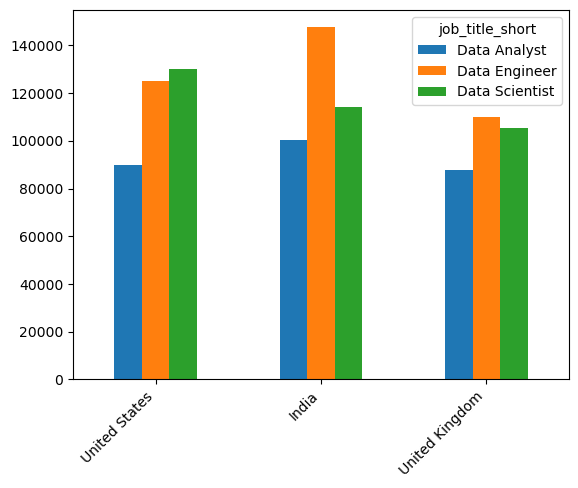

In [33]:
#df_reset = df_sum_salary.reset_index()
top_countries = df['job_country'].value_counts().head(3).index

df_sum_salary = df_sum_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_sum_salary = df_sum_salary[job_titles]


df_sum_salary

df_sum_salary.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')

---